In [1]:
import numpy as np
import pandas as pd
from src.load_BNB_json import *
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = load_BNB_data()
df.head()

,id,neighborhood,host_id,name,avgRating,reviewsCount,bathrooms,bedrooms,beds,roomAndPropertyType,roomTypeCategory,roomType,price,lat,lng
0,21191971,North End,153050514,"Huge, beautiful home with view.",4.82,78,4.0,4.0,7.0,Entire house,entire_home,Entire home/apt,600,47.27204,-122.46843
1,11260116,Wilson,58770767,North Tacoma Nights,4.94,145,1.0,2.0,2.0,Private room in house,private_room,Private room,55,47.26098,-122.51363
2,4340673,Stanley,22534829,Quiet upstairs suite private bath.,4.82,68,1.0,1.0,2.0,Private room in house,private_room,Private room,60,47.23954,-122.45935
3,38977910,West End,23336429,Gated 5 Bedroom Tacoma Retreat,5.00,15,3.0,5.0,5.0,Entire house,entire_home,Entire home/apt,176,47.28048,-122.50870
4,27283453,Tillow,188538325,Scenic Lake View Home,4.88,26,3.5,4.0,5.0,Entire house,entire_home,Entire home/apt,295,47.25296,-122.54358


In [3]:
multi_listings_mask = df.duplicated(subset='host_id')
hosts_with_multiple_listings = np.unique(df.host_id[multi_listings_mask])
neighborhoods_with_multiple_listings = df.neighborhood[multi_listings_mask].values
multiple_listings_df = df[df.host_id.isin(hosts_with_multiple_listings)]

In [5]:
multiple_listings_entire_unit = multiple_listings_df[multiple_listings_df['roomAndPropertyType'].apply(lambda s: s[:6] == 'Entire')]

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

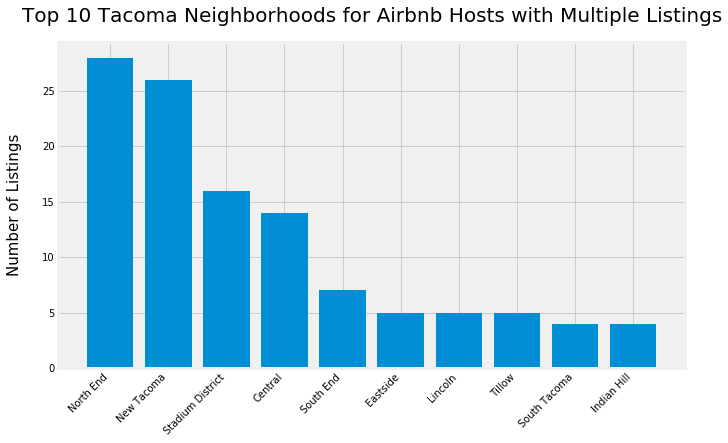

In [6]:
top_10_areas = multiple_listings_entire_unit.neighborhood.value_counts().sort_values(ascending=False)[:10]
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(top_10_areas.index, top_10_areas)
ax.set_ylabel('Number of Listings', labelpad=20, size=15)
ax.set_title('Top 10 Tacoma Neighborhoods for Airbnb Hosts with Multiple Listings', pad=20, size=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout
#plt.savefig('images/Top_10_Neighborhoods.png')

In [7]:
multiple_listings_entire_unit.to_csv('data/problem_locations.csv', index=False)